---------------------
# Project: Marketing Campaign Analysis
### Solution Notebook by Shweta Chandole 
#### Date: 08-Nov-2021

--------------------
## Context
--------------------

Marketing Analytics broadly refers to the practice of using analytical methods and techniques to understand the effectiveness of various marketing activities and deploy data driven decisions to optimize for ROI on conversion rates. 
It typically involves analyzing various metrics around customer engagement with various marketing activities including but not limited to ATL (above the line) marketing activities, BTL (below the line) campaigns, and targeting personalized offers. Typically the variables of interest are customer profile, campaign conversion rates and costs associated with various marketing channels. These can generate valuable insights that can help an organization form better marketing strategies, optimize/innovate on delivery, and achieve overall growth. 

---------------------
## Problem Statement
--------------------
Company 'All You Need' has hired you as a Data Scientist and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be and the conversion rate is very low.
Your task is to analyze the related data, understand the problem, and identify key insights and recommendations for the CMO to potentially implement. 

The data set marketing_data.csv consists of 2,240 customers of All You Need company with data on:

- Campaign successes/failures
- Product preferences
- Channel performances
- Customer profiles based on the spending habits

-------------------
## Data Dictionary
-------------------
- ID : Unique ID of each customer
- Year_Birth : Age of the customer
- Education : Customer's level of education
- Marital_Status : Customer's marital status
- Kidhome : Number of small children in customer's household
- Teenhome : Number of teenagers in customer's household
- Income : Customer's yearly household income
- Recency : Number of days since the last purchase
- MntFishProducts : The amount spent on fish products in the last 2 years
- MntMeatProducts : The amount spent on meat products in the last 2 years
- MntFruits : The amount spent on fruits products in the last 2 years
- MntSweetProducts : Amount spent on sweet products in the last 2 years
- MntWines : The amount spent on wine products in the last 2 years
- MntGoldProds : The amount spent on gold products in the last 2 years
- NumDealsPurchases : Number of purchases made with discount
- NumCatalogPurchases : Number of purchases made using catalog (buying goods to be shipped through the mail)
- NumStorePurchases : Number of purchases made directly in stores
- NumWebPurchases : Number of purchases made through the company's website
- NumWebVisitsMonth : Number of visits to company's website in the last month
- AcceptedCmp1 : 1 if customer accepted the offer in the first campaign, 0 otherwise 
- AcceptedCmp2 : 1 if customer accepted the offer in the second campaign, 0 otherwise
- AcceptedCmp3 : 1 if customer accepted the offer in the third campaign, 0 otherwise
- AcceptedCmp4 : 1 if customer accepted the offer in the fourth campaign, 0 otherwise
- AcceptedCmp5 : 1 if customer accepted the offer in the fifth campaign, 0 otherwise
- AcceptedCmp6 : 1 if customer accepted the offer in the last campaign, 0 otherwise 
- Complain : 1 If the customer complained in the last 2 years, 0 otherwise
- Country: Country customer belongs to

## Importing libraries and overview of the dataset

In [1]:
# Library to supress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Load the dataset

In [2]:
# loading the datset

df = pd.read_csv('Marketing data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,0,189,104,...,6,1,0,1,0,0,0,0,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,0,464,5,...,7,5,0,1,0,0,0,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,0,134,11,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,0,10,0,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,0,6,16,...,2,7,1,1,0,0,0,0,0,SP


### Check info of the dataset

In [3]:
#Checking the info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

**Observations:**
- There are a total of 27 columns and 2,240 observations in the dataset
- We can see that the Income column has less than 2,240 non-null values i.e. column has missing values. We'll explore this further


### Let's check the percentage of missing values for the Income column.

In [4]:
# % Null values in the Income column

(df.isnull().sum()/df.shape[0]*100)['Income']

1.0714285714285714

**Observations:**
- Income has ~1.07% missing values.

### Let's create a list for numerical columns in the dataset and check the summary statistics 

### **Question 1: Find the summary statistics for numerical columns and write your observations. (use describe function).** - 4 Marks

In [5]:
# num_cols contain numerical varibales 
num_cols=['Year_Birth','Income','Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Kidhome',
       'Teenhome']

In [6]:
# printing descriptive statistics of numerical columns

#Uncomment the following code and fill in the blanks
#df[___]._____.T

df[num_cols].describe().T       # Q1 answer -ShwetaC

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0
MntGoldProds,2240.0,44.021875,52.167439,0.0,9.00,24.0,56.00,362.0
NumDealsPurchases,2240.0,2.325000,1.932238,0.0,1.00,2.0,3.00,15.0


----
**Observations: (Answer for Q1)**      _-ShwetaC._          

**Summary Statistics for Numerical Variables**
- Year_Birth has minimum value 1893 (this is likely to be erroneous record). Here, 1st quartile value is 1959, median is 1970 with std. deviation of ~12 yrs, and max value is 1996. 
    So, 95% of customers could range between age range 27 to 75 (1970 +/- 24).
- For Income column, the mean is 52267, median is 51381, with a std. deviation of 25173. Also, there is a large gap between 3rd quartile value (68522) and max value (666666), so there could be outliers on the right side (higher end) of this data.
- Recency column: Here, average gap since last purchase is 49 days. For this column, Min is 0, Max is 99, Q1=24, Q2(median)=49 and Q3=74. So, it can be seen that this is a fairly normally distributed data, with average gap since last purchase equal to median value. We can use this variable further to see if it affects any other categorical variables.
- MntWines column has Mean 303.93, Median 173.5, std. deviation 336, and max value 1493. 
- MntMeatProducts column has Mean 166.97, Median 67, std. deviation 225 and max value 1725. 
- Mean values for Amount spent on other products like Fruits, Sweets, Fish and Gold products are 26.3, 27, 37.5 and 44 respectively, which are very less compared to wines and meat products.
- Based on mean data for all amounts-spent columns, Wines and Meat products are the most spent on product types, while Sweets and Fruits are the least spent on product types.
- For column NumStorePurchases average is 5.79, highest compared to other purchase columns, with second highest average being 4.08 for  NumWebPurchases.
- Average deal and catalogue purchases for entire dataset is ~2.5, much lower than Store and Web.
- Average web visits per month are 5.3, which is slightly higher than the average Web purchases (4.08), so it might mean that customers have a high chance of making Web purchases when they visit the website.
- Customers with kids (column Kidhome) and with teenagers (column TeenHome) have close mean values at 0.44 and 0.5 respectively. Maximum kids or teenagers in a home are 2.

**Summary Statistics for Categorical Variables (using data description below)**
- Higher education level customers are at 88% combined (50% Gradute, 21.6% PhD, 16.5% Masters)
- Married or Together customers are at a combined ~64% (38.57% Married, 25.89% Together), followed by Single/Divorced/Widowed combined at ~35%
- Campaign accepted percentages for campaigns 1 to 6 are respectively - 7.2, 15, 7.2, 6.4, 7.4, 1.3
- very little percentage customers complained at 1%
- Most customers belong to Spain at 48.9%, followed by South Africa at 15%, and Canada at 11.9%

---

### Let's create a list for categorical columns in the dataset and check the count of each category

In [7]:
#cat_cols contain categorical variables
cat_cols=['Education', 'Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'AcceptedCmp6', 'Complain', 'Country']

In [8]:
# Printing the count of each unique value in each column

for column in cat_cols:
    print(df[column].value_counts(normalize=True))
    print("-" * 40)

Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Basic         0.024107
Name: Education, dtype: float64
----------------------------------------
Married     0.385714
Together    0.258929
Single      0.214286
Divorced    0.103571
Widow       0.034375
Alone       0.001339
YOLO        0.000893
Absurd      0.000893
Name: Marital_Status, dtype: float64
----------------------------------------
0    0.927232
1    0.072768
Name: AcceptedCmp3, dtype: float64
----------------------------------------
0    0.935714
1    0.064286
Name: AcceptedCmp4, dtype: float64
----------------------------------------
0    0.925446
1    0.074554
Name: AcceptedCmp5, dtype: float64
----------------------------------------
0    0.927232
1    0.072768
Name: AcceptedCmp1, dtype: float64
----------------------------------------
0    0.850893
1    0.149107
Name: AcceptedCmp2, dtype: float64
----------------------------------------
0    0.986607
1    0.013393
Name: AcceptedCmp6

**Observations:**
- In education, 2n cycle and Master means the same thing. We can combine these two categories.
- There are many categories in marital status. We can combine the category 'Alone' with 'Single'.
- It is not clear from the data that what do the terms 'Absurd', and 'YOLO' actually mean. We can combine these categories to make a new category - 'Others'.
- There are only 21 customers who complained in the last two years.
- The majority of the customers belong to Spain and least to Mexico.
- The most common educational status is Graduation
- The most common marital status is Married



## Data Preprocessing and Exploratory Data Analysis

In this section, we will first prepare our dataset for analysis.
- Fixing the categories
- Creating new columns as the total amount spent, total purchase made, total kids at home, and total accepted campaigns
- Dealing with missing values and outliers
- Extract key insights from the data

### Replacing the "2n Cycle" category with "Master" in Education and "YOLO", "Alone", and "Absurd" categories with "Single" in Marital_Status

In [9]:
# Replacing 2n Cycle with Master

df["Education"].replace("2n Cycle", "Master", inplace=True)

In [10]:
# Replacing YOLO, Alone, Absurd with Single

df["Marital_Status"].replace(["Alone",], "Single", inplace=True)

In [11]:
df['Marital_Status'].replace(["Absurd", "YOLO"], "Others", inplace=True)

We have fixed the categories in the Marital_Status. Now, let's see the distribution count in different categories for marital status.

In [12]:
df.Marital_Status.value_counts()

Married     864
Together    580
Single      483
Divorced    232
Widow        77
Others        4
Name: Marital_Status, dtype: int64

**Observation**:

- The majority of customer belong to married category and the other category have only 4 records.

### Creating new features from the existing features

In [13]:
# creating new features to get overall picture of a customer, how much he/she has spend, 
#how many children he/she has, total campaigns accepted, etc.


# total spending by a customer
spending_col = [col for col in df.columns if 'Mnt' in col]
df['Total_Spending'] = df[spending_col].sum(axis = 1) 

#total purchases made by a customer
platform_col = [col for col in df.columns if 'Purchases' in col]
df['Total_Purchase'] = df[platform_col].sum(axis = 1) 

#total no. of childern
df['NumberofChildren'] = df['Kidhome'] + df['Teenhome']  

# Total no. of campaign accepted by a customer
campaigns_cols = [col for col in df.columns if 'Cmp' in col]
df['TotalCampaignsAcc'] = df[campaigns_cols].sum(axis=1)

### Let's check outliers for new variables - Total_Spending, Total_Purchase. Also, let's analyze the Year_Birth column as we observed above that it had a minimum value of 1893.

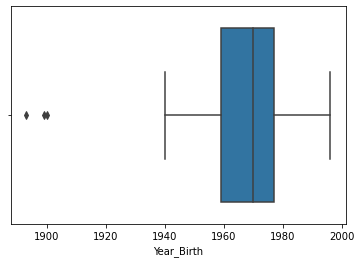

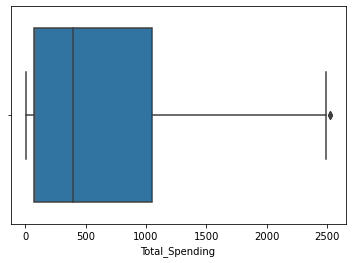

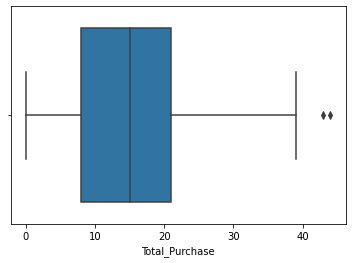

In [14]:
# Plotting boxplot for Year_Birth, Total_Spending, Total_Purchase

cols=['Year_Birth','Total_Spending','Total_Purchase']
for i in cols:
    sns.boxplot(x=df[i])
    plt.show()

**Observations:**
- The birth year is reported as <=1900 for some users, while the current year is 2021. it's very unlikely that the person is alive. it may be a reporting error.
- There are some outliers in total spending and total purchase. 
- The observations marked as outliers are very closed to the upper whisker and some extreme points can be expected for variables like total spending. We can leave these outliers untreated. 

Let's check the number of observations for which year birth is less than 1900. 

In [15]:
df[df['Year_Birth'] < 1900]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Complain,Country,Total_Spending,Total_Purchase,NumberofChildren,TotalCampaignsAcc
513,11004,1893,Master,Single,60182.0,0,1,23,8,0,...,0,0,0,0,0,SA,22,4,1,0
827,1150,1899,PhD,Together,83532.0,0,0,36,755,144,...,1,0,0,0,0,SP,1853,15,0,1


**Observation**:
- There are only 2 observations for which birth year is less than 1900. We can drop these observations.

In [16]:
#keeping data for customers having birth year >1900

df = df[df['Year_Birth'] > 1900]

### Check the outliers and impute the missing values for the Income variable

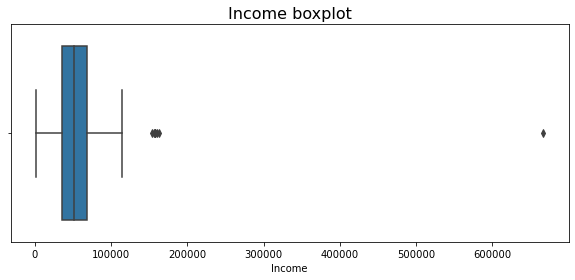

In [17]:
#plotting Boxplot for income

plt.figure(figsize=(10,4))
sns.boxplot(df['Income'])
plt.title('Income boxplot', size=16)
plt.show()

**Observations:**

- We can see from the boxplot that there are some outliers in the income variable.
- Let's find the value at upper whisker to check how many observations are marked as outliers.


In [18]:
#Calculating the upper whisker for the Income variable

Q1 = df.quantile(q=0.25) #First quartile
Q3 = df.quantile(q=0.75) #Third quartile
IQR = Q3 - Q1            #Inter Quartile Range

upper_whisker = (Q3 + 1.5*IQR)['Income']   #Upper Whisker
print(upper_whisker)

118348.5


In [19]:
#Checking the observations marked as outliers
df[df.Income>upper_whisker]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Complain,Country,Total_Spending,Total_Purchase,NumberofChildren,TotalCampaignsAcc
325,4931,1977,Graduation,Together,157146.0,0,0,13,1,0,...,0,0,0,0,0,SA,1730,28,0,0
497,1501,1982,PhD,Married,160803.0,0,0,21,55,16,...,0,0,0,0,0,US,1717,44,0,0
527,9432,1977,Graduation,Together,666666.0,1,0,23,9,14,...,0,0,0,0,0,SA,62,11,1,0
731,1503,1976,PhD,Together,162397.0,1,1,31,85,1,...,0,0,0,0,0,SP,107,1,2,0
853,5336,1971,Master,Together,157733.0,1,0,37,39,1,...,0,0,0,0,0,SP,59,2,1,0
1826,5555,1975,Graduation,Divorced,153924.0,0,0,81,1,1,...,0,0,0,0,0,SP,6,0,0,0
1925,11181,1949,PhD,Married,156924.0,0,0,85,2,1,...,0,0,0,0,0,CA,8,0,0,0
2204,8475,1973,PhD,Married,157243.0,0,1,98,20,2,...,0,0,0,0,0,IND,1608,37,1,0


**Observations**:

- We have only 8 observations with an income greater than the upper whisker. 
- Only 3 observations (ID- 4931, 1501, 8475) out of 8 outliers have purchased more than 11 times in the last 2 years.
- Other 5 observations have very less amount of total spending.

**Let's compare the summary statistics for these observations with observations on the other side of the upper whisker.**

In [20]:
#Checking the summary statistics for observations marked as outliers
df[df.Income>upper_whisker].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,8.0,5989.250,3525.251308,1501.0,4074.00,5445.5,8714.25,11181.0
Year_Birth,8.0,1972.500,10.028531,1949.0,1972.50,1975.5,1977.00,1982.0
Income,8.0,221604.500,179850.404431,153924.0,157090.50,157488.0,161201.50,666666.0
Kidhome,8.0,0.375,0.517549,0.0,0.00,0.0,1.00,1.0
Teenhome,8.0,0.250,0.462910,0.0,0.00,0.0,0.25,1.0
Recency,8.0,48.625,33.687376,13.0,22.50,34.0,82.00,98.0
MntWines,8.0,26.500,30.798887,1.0,1.75,14.5,43.00,85.0
MntFruits,8.0,4.500,6.524678,0.0,1.00,1.0,5.00,16.0
MntMeatProducts,8.0,621.875,846.511402,1.0,7.25,17.0,1592.00,1725.0
MntFishProducts,8.0,4.250,5.650537,1.0,1.00,2.0,3.50,17.0


In [21]:
#Checking the summary statistics for observations not marked as outliers
df[df.Income<upper_whisker].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2205.0,5585.439456,3247.546423,0.0,2815.0,5455.0,8418.0,11191.0
Year_Birth,2205.0,1968.904308,11.705801,1940.0,1959.0,1970.0,1977.0,1996.0
Income,2205.0,51622.094785,20713.063826,1730.0,35196.0,51287.0,68281.0,113734.0
Kidhome,2205.0,0.442177,0.537132,0.0,0.0,0.0,1.0,2.0
Teenhome,2205.0,0.506576,0.544380,0.0,0.0,0.0,1.0,2.0
Recency,2205.0,49.009070,28.932111,0.0,24.0,49.0,74.0,99.0
MntWines,2205.0,306.164626,337.493839,0.0,24.0,178.0,507.0,1493.0
MntFruits,2205.0,26.403175,39.784484,0.0,2.0,8.0,33.0,199.0
MntMeatProducts,2205.0,165.312018,217.784507,0.0,16.0,68.0,232.0,1725.0
MntFishProducts,2205.0,37.756463,54.824635,0.0,3.0,12.0,50.0,259.0


**Observations**:

- None of the outliers have accepted any of the campaigns or have submitted any complaints in the last 2 years.
- We can see that customers who are outliers have lower mean expenditure per customer for all the products except meat products.
- The outliers have a higher number of catalog purchases on average and very low number of web purchases.
- We can drop the 5 observations at indices [527, 731, 853, 1826, 1925] as they would not add value to our analysis.

In [22]:
#Dropping 5 observations at indices 527, 731, 853, 1826, 1925
df.drop(index=[527, 731, 853, 1826, 1925], inplace=True)

### Check the distribution for Income

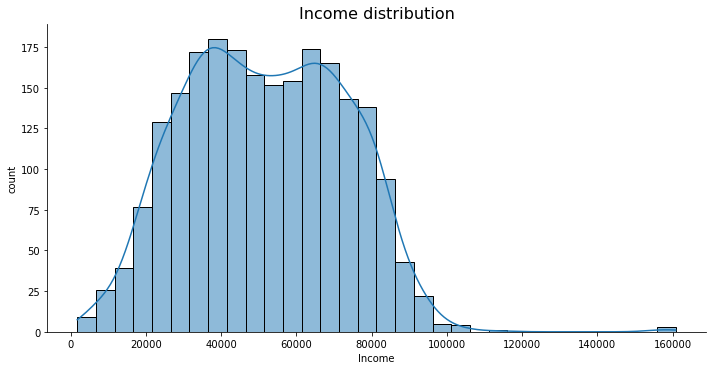

In [23]:
#plotting displot for income

sns.displot(df['Income'], kde=True, height=5, aspect=2)
plt.title('Income distribution', size=16, )
plt.ylabel('count');

**Observations:**

- After treating outliers, the distribution for the income variable is close to normal distribution with very few extreme observations to the right.
- We will replace the missing values for the income variable with the median, and not mean, as the variable is slightly skewed to the right

In [24]:
#filling null values with median

df['Income'].fillna(df.Income.median(), inplace=True)

### Analyzing all the campaigns

### **Question 2: Write your observations on acceptance rate for each campaign given in the below plot.** - 4 Marks

#### Let's find out what is the acceptance rate for each campaign?

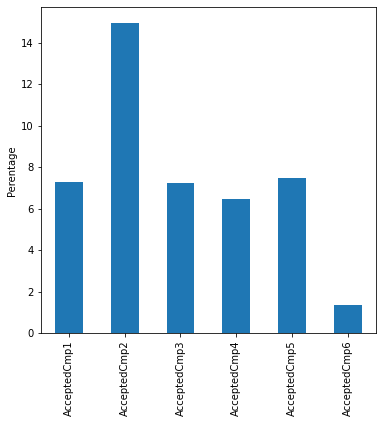

In [25]:
# PLotting the % acceptance for every campaign

Camp_cols=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']

success_campaign=(df[Camp_cols].sum()/df.shape[0])*100

# plot
success_campaign.plot(kind='bar', figsize=(6,6))
plt.ylabel("Perentage")
plt.show()

----
**Observations: (Answer for Q2)**   _-ShwetaC._
- Campaign 2 has the highest acceptance rate at ~15%
- Campaign 6 has the lowest acceptance rate at slightly over 1%
- Campaigns 1, 3 and 5 have approximately same acceptance rate (~ 7-7.5%)
- 4th campaign has an acceptance rate of nearly 6.5%

----

### Let's analyze what kind of customer are accepting campaigns?

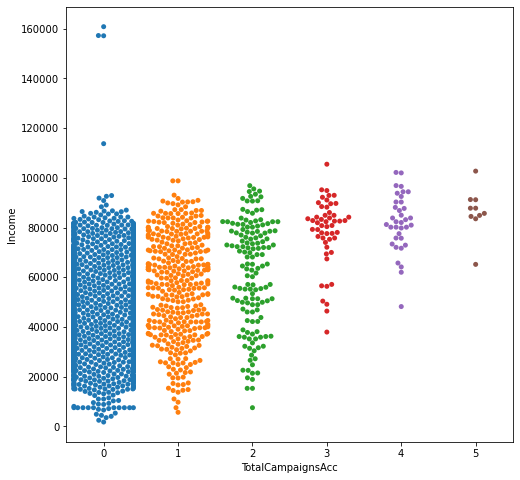

In [26]:
plt.figure(figsize=(8,8))
sns.swarmplot(x='TotalCampaignsAcc', y='Income', data=df)
plt.show()

**Observations:**
- Higher the income higher the number of campaigns accepted.

----
**(Additional observation)** _-ShwetaC._
- Customers in the medium income range 70k-90k show most acceptance to all campaigns.

----

In [27]:
# Let's see the mean income of customers
df.Income.mean()

51762.59811827957

### **Question 3: Write your observations on acceptance rate for each campaign according to the income level.** - 7 Marks

The mean income of customers is close to 52K. Let's divide the income into 2 segments of income>52k and income<52k and see the acceptance rate in each segment.

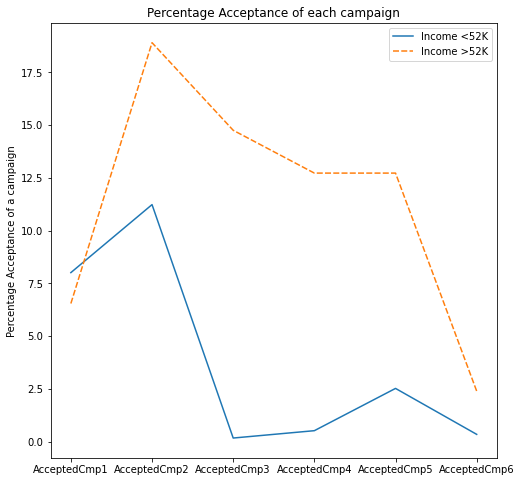

In [28]:
# making dataframes of customers having income <52k and >52K
df1=df[df.Income<52000]
df2=df[df.Income>52000]

Camp_cols=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']

#Calculating success rate of each campaign for both segments 
success_campaign1=pd.DataFrame((df1[Camp_cols].sum()/df1.shape[0])*100, columns=['Income <52K'])

success_campaign2=pd.DataFrame((df2[Camp_cols].sum()/df2.shape[0])*100, columns=['Income >52K'])

new_df=pd.concat([success_campaign1, success_campaign2], axis=1)

# plot
plt.figure(figsize=(8,8))
sns.lineplot(data=new_df)
plt.title("Percentage Acceptance of each campaign")
plt.ylabel("Percentage Acceptance of a campaign")
plt.show()

----
**Observations: (Answer for Q3)**    _-ShwetaC_

**For the below list of observations, lets call customers with Income < 52K as the "lower segment" and customers with Income > 52K as the "higher segment".**

- For Campaign 1, the lower segment shows slightly more acceptance at ~8% as compared to higher segment at ~6%. 
- The Campaign 2 has highest acceptance rates by customers in both income segments. It is accepted more by the higher segment at ~19%, whereas lower segment acceptance rate is ~11%.
- For Campaign 3, the campaign acceptance rates drop significantly for the lower segment customers but are still high for higher segment customers.
- For lower segment (Income<52K) customers, the acceptance rates drop significantly for campaigns  3, 4 and 6 ranging in 0-0.5% and only slight increase at ~2.5% for campaign 5, which is not significant.
- For higher segment (Income>52K) customers, the campaign acceptance rates are still high for campaigns 3, 4 and 5 at ~15%, ~12.5% and ~12.5% respectively, with a low insignificant value of ~2.5% for Campaign 6.
- We can also see that these findings are in line with the swarmplot we saw earlier for campaign acceptance by income levels, where we can see that the most acceptance rate density is towards the center, where income levels are well above 60k.

----

#### Let's find out who has accepted the last campaign and what could be the reason?

In [29]:
df[df['AcceptedCmp6']==1].shape

(30, 31)

- There are only 30 customers who have accepted the last campaign.
- Let's check if these customers are new or they have accepted previous campaigns as well.

In [30]:
grouped2=df.groupby('AcceptedCmp6').mean()['TotalCampaignsAcc']
grouped2

AcceptedCmp6
0    0.404632
1    3.633333
Name: TotalCampaignsAcc, dtype: float64

**Observations:**
- We know that the maximum number of campaigns any customer has accepted is 5.
- We can observe that the value for TotalCampaignsAcc is ~3.6 for customers who have accepted the last campaign.
- This implies that these 30 customers are those loyal customers who have been accepting most of the campaigns.

### It could be that different campaigns are focussed on different set of products. Let's check if the product preference for those who accepted the campaigns is different from those who didn't - using amount spent and number of purchases

Let's define a function which will take the column name for the product as input and will generate the barplot for every campaign and average amount spent on a product

In [31]:
def amount_per_campaign(columns_name):
    p1=pd.DataFrame(df.groupby(['AcceptedCmp1']).mean()[columns_name]).T
    p2=pd.DataFrame(df.groupby(['AcceptedCmp2']).mean()[columns_name]).T
    p3=pd.DataFrame(df.groupby(['AcceptedCmp3']).mean()[columns_name]).T
    p4=pd.DataFrame(df.groupby(['AcceptedCmp4']).mean()[columns_name]).T
    p5=pd.DataFrame(df.groupby(['AcceptedCmp5']).mean()[columns_name]).T
    p6=pd.DataFrame(df.groupby(['AcceptedCmp6']).mean()[columns_name]).T
    pd.concat([p1,p2,p3,p4,p5,p6],axis=0).set_index([Camp_cols]).plot(kind='line', figsize=(8,8))
    plt.ylabel('Average amount spend on' + ' ' + columns_name)
    plt.show()

#### Use the function defined above to generate barplots for different purchasing Products

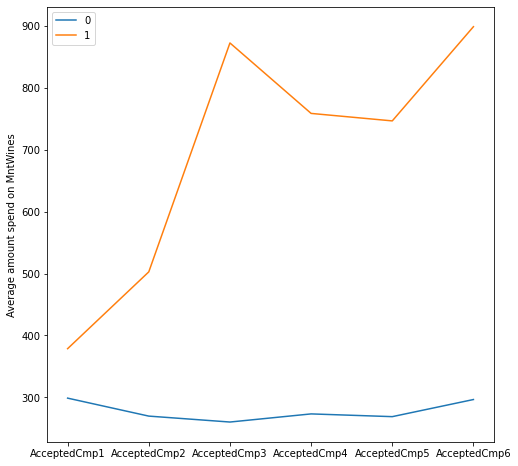

In [32]:
#here is an example showing how to use this function on the column MntWines
amount_per_campaign('MntWines')

**Observations:**
- For the customers accepting campaign 3, 4, 5, and 6 the average amount spent on wine is quite high.

### **Question 4: Write the code and your observations on average amount spent on different products across all campaigns.** - 7 Marks

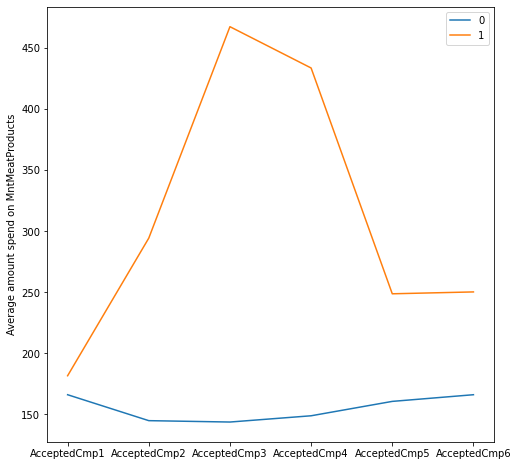

In [33]:
#meat products

#call the function amount_per_campaign for MntMeatProducts
amount_per_campaign('MntMeatProducts')        #Q4 part1 answer -ShwetaC

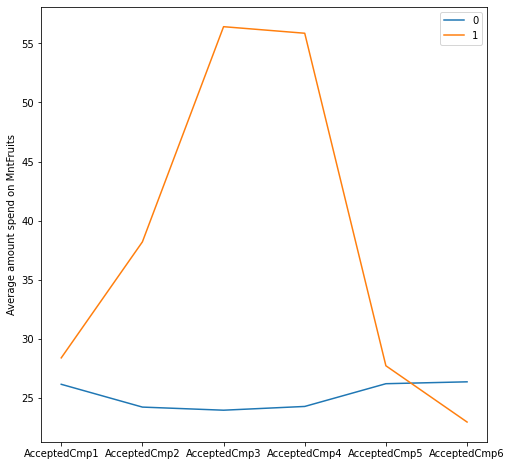

In [34]:
# Fruit products

#call the function amount_per_campaign for MntFruits
amount_per_campaign('MntFruits')       #Q4 part2 answer -ShwetaC

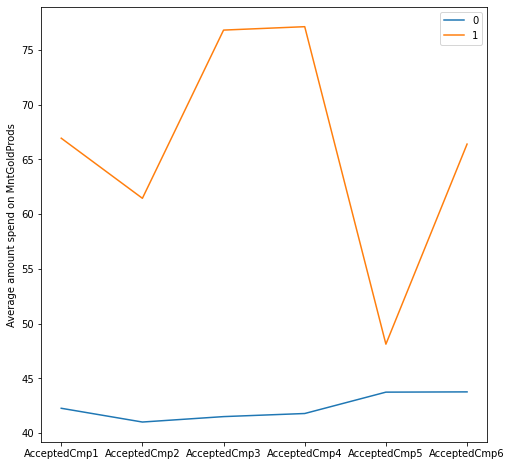

In [35]:
# gold products

#call the function amount_per_campaign for MntGoldProds
amount_per_campaign('MntGoldProds')       #Q4 part3 answer -ShwetaC

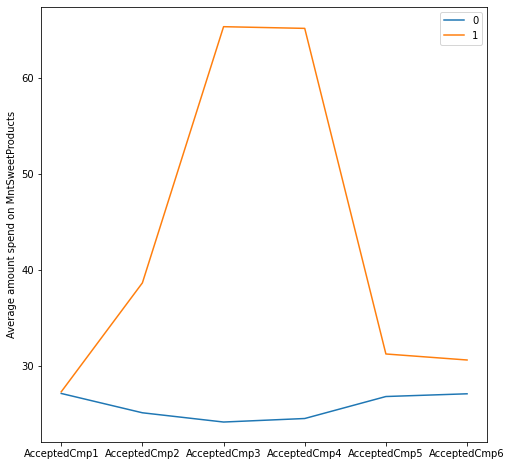

In [36]:
#sweet products

#call the function amount_per_campaign for MntSweetProducts
amount_per_campaign('MntSweetProducts')       #Q4 part4 answer -ShwetaC

----
**Observations: (Answer for Q4)** _-ShwetaC._

Part 1: Meat Products
- For customers accepting campaigns 3 and 4, avg amount spent on Meat products is very high in the range ~430-460.
- For customers accepting campaigns 2, 5 and 6, avg amount spent on Meat products is somewhat high around 250-300.
- These average spendings on Meat products are higher than most other products, except for that on wines.

Part 2: Fruits
- For customers accepting campaigns 3 and 4, average amount spent on Fruits is highest at ~55.
- For customers accepting campaigns 2, average amount spent on Fruits is moderately high around 37.
- Average amount spent on fruits is quite low for other campaigns

Part 3: Gold Products
- Average amount spent on Gold products is highest at around 75 for customers accepting campaigns 3 and 4.
- Customers accepting campaigns 1, 2 and 6 have moderately high (in the range 60-67) average amount spent on Gold products.

Part 4: Sweet Products
- For customers accepting campaigns 3 and 4, average amount spent on Sweet products is high close to 65-70.
- Average spending on Sweet products are not that significant for customers accepting other campaigns.

----

### We have analyzed the relationship between campaigns and different products. Now, let's see the relationship of campaigns with different purchasing channels.

### Relationship of campaigns with different purchasing channels.

We have a defined a function which will take the column name of the channel name as input and will generate the barplot for every campaign and average purchase made through that channel if the campaign is accepted

In [37]:
def Purchases_per_campaign(columns_name):
    dp1=pd.DataFrame(df.groupby(['AcceptedCmp1']).mean()[columns_name]).T
    dp2=pd.DataFrame(df.groupby(['AcceptedCmp2']).mean()[columns_name]).T
    dp3=pd.DataFrame(df.groupby(['AcceptedCmp3']).mean()[columns_name]).T
    dp4=pd.DataFrame(df.groupby(['AcceptedCmp4']).mean()[columns_name]).T
    dp5=pd.DataFrame(df.groupby(['AcceptedCmp5']).mean()[columns_name]).T
    dp6=pd.DataFrame(df.groupby(['AcceptedCmp6']).mean()[columns_name]).T
    pd.concat([dp1,dp2,dp3,dp4,dp5,dp6],axis=0).set_index([Camp_cols]).plot(kind='line', figsize=(8,8))
    plt.ylabel('Average' + ' ' + columns_name)
    plt.show()

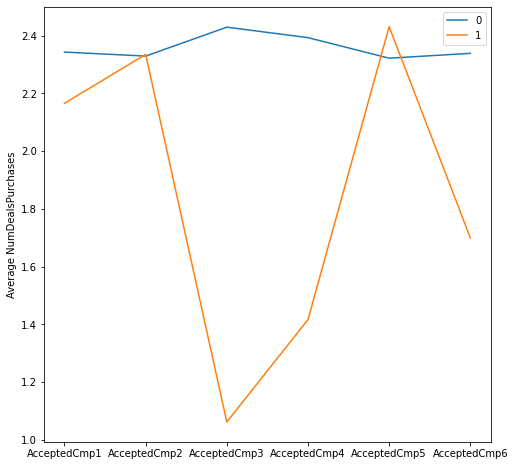

In [38]:
#here is an example showing how to use this function on the column NumDealsPurchases
Purchases_per_campaign('NumDealsPurchases')

**Observations:**
- For the customers accepting campaign 3, 4, and 6 the average deals purchase is quite low.

----
**(Additional Observations)** _-ShwetaC._
- Campaign 2 and 5 have a high average purchases from Deals Channel

----

### **Question 5: Write the code and your observations on average number of purchases from different channels across all campaigns.** - 7 Marks

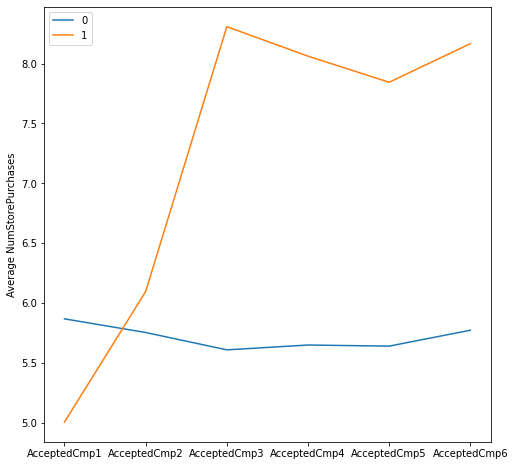

In [39]:
# store purchase

#call the function Purchases_per_campaign for NumStorePurchases
Purchases_per_campaign('NumStorePurchases')     #Q5 part1 answer -ShwetaC

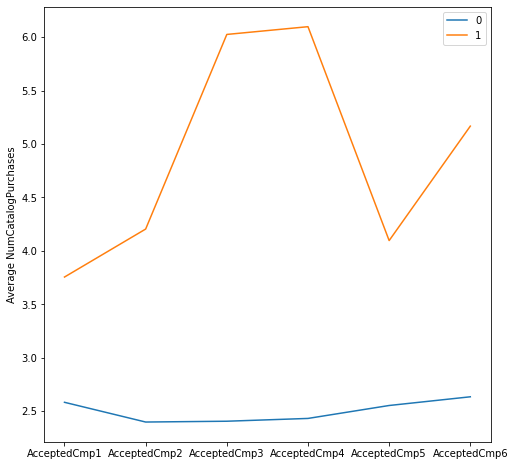

In [40]:
#Catalog purchase

#call the function Purchases_per_campaign for NumCatalogPurchases
Purchases_per_campaign('NumCatalogPurchases')      #Q5 part2 answer -ShwetaC

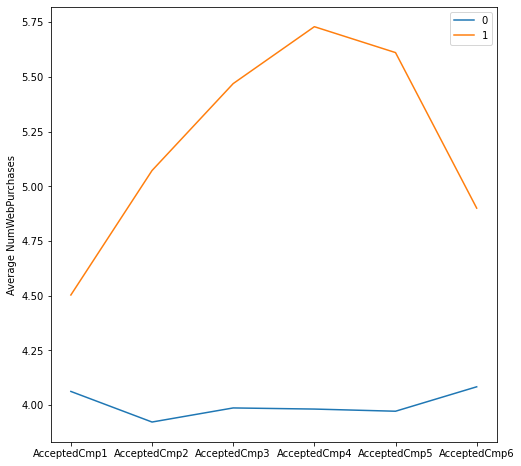

In [41]:
#Web purchases

#call the function Purchases_per_campaign for NumWebPurchases
Purchases_per_campaign('NumWebPurchases')      #Q5 part3 answer -ShwetaC

----
**Observations: (Answer for Q5)** _-ShwetaC._

Part 1: Store Purchases
- For customers accepting campaigns 3, 5 and 6, average store purchases are very high, 
    which may imply that these campaigns were more accepted by the customers who made store purchases.
- Even Campaign 2 has a good number of avg store purchases at ~6, this is important to note as campaign 2 has highest acceptance rate in all campaigns.

Part 2: Catalog Purchases
- Average catalog purchases are high around 6 for customers accepting campaigns 3 and 4
- Average catalog purchases are also good for campaign 6 at avg value 5
- Average catalog purchases are also good for campaigns 2 and 5 at average value 4

Part 3: Web Purchases
- Average Web purchases are quite high for customers accepting campaigns 3, 4, 5 and moderately high for customers accepting campaigns 2 and 6.
- Overall, it can be observed that customers doing web purchases accepted more campaigns than any other purchase channels.

----

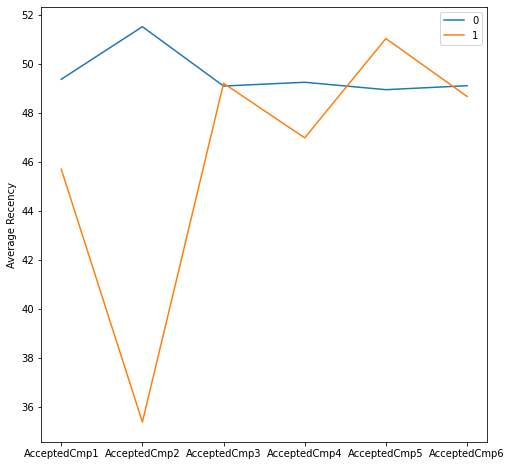

In [42]:
#Recency

Purchases_per_campaign('Recency')

**Observations:**
- Average recency of the customers who accepted campaign 2 is quite low which implies that campaign 2 was accepted by the customers who recently purchased an item.

----
**(Additional observations)** _-ShwetaC._
- The average recency for all campaigns accepted or not accepted ranges from ~35 to 52 days. So, it can be assmued that most of the campaigns related data is collected in the last 2 months.
- Campaigns 1 and 4 were accepted by customers who made purchases in the last 1.5 months
- Campaigns 3, 5 and 6 were accepted by customers who made purchase almost 7-8 weeks ago.
- Customers who have not accepted any campaign offers have not visited or made purchases for more than last 1.5 months (see blue line graph is above 48 days in the plot above).

----

#### We have analyzed the relationship between campaigns and numerical variables. Let's see the relationship of campaigns with different categorical variables

We will check the percentage acceptance of each campaign with respect to each category in the categorical variable. The percentage acceptance is calculated as number of customers who have accepted the campaign to the total number of customers.

In [43]:
def Cat_Campaign_Relation(df, column_name):
    e1=(df.groupby([column_name]).sum()['AcceptedCmp1']/df.groupby([column_name]).count()['AcceptedCmp1'])
    e2=(df.groupby([column_name]).sum()['AcceptedCmp2']/df.groupby([column_name]).count()['AcceptedCmp2'])
    e3=(df.groupby([column_name]).sum()['AcceptedCmp3']/df.groupby([column_name]).count()['AcceptedCmp3'])
    e4=(df.groupby([column_name]).sum()['AcceptedCmp4']/df.groupby([column_name]).count()['AcceptedCmp4'])
    e5=(df.groupby([column_name]).sum()['AcceptedCmp5']/df.groupby([column_name]).count()['AcceptedCmp5'])
    e6=(df.groupby([column_name]).sum()['AcceptedCmp6']/df.groupby([column_name]).count()['AcceptedCmp6'])
    df_new=pd.concat([e1,e2,e3,e4,e5,e6],axis=1).T
    plt.figure(figsize=(8,8))
    sns.lineplot(data=df_new, markers=True, linewidth=2)
    plt.ylabel('Percentage Acceptance')
    plt.show()

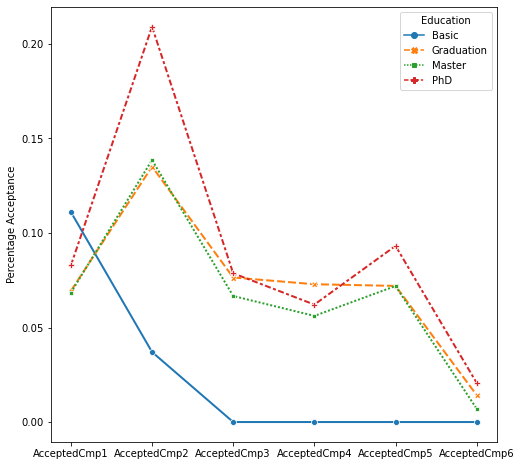

In [44]:
#here is an example showing how to use this function on the column Education
Cat_Campaign_Relation(df, 'Education')

**Observations:**

- More than 20% of the customers with Ph.D have accepted campaign 2.
- Customers with basic education have only accepted campaign 1 and 2.
- Except customers with basic education level, all education levels follow the same trend.

### **Question 6: Write the code and your observations on percentage acceptance for different categorical variables across all campaigns.** - 7 Marks

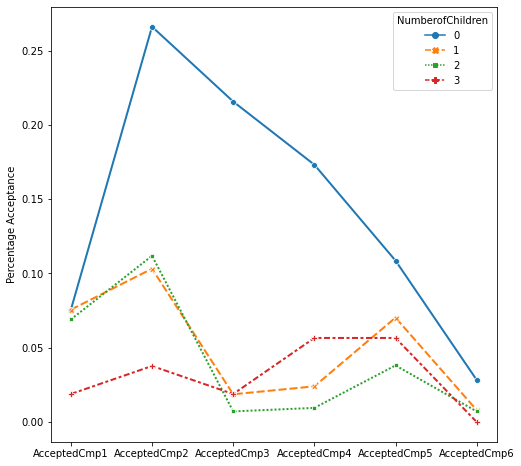

In [45]:
#NumberofChildren

#call the function Cat_Campaign_Relation for NumberofChildren
Cat_Campaign_Relation(df, 'NumberofChildren')    #Q6 part1 answer -ShwetaC

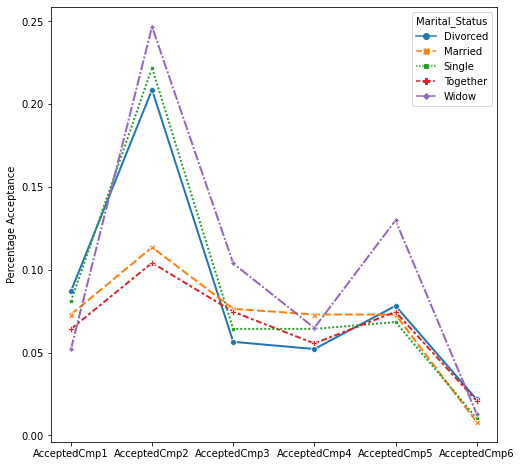

In [46]:
#Let's filter the observations with 'Others' category as they are only 4 such observations
df_rest=df[df.Marital_Status!='Others']

#call the function Cat_Campaign_Relation for Marital_Status with dataframe df_rest
Cat_Campaign_Relation(df_rest, 'Marital_Status')     #Q6 part2 answer -ShwetaC

<AxesSubplot:ylabel='Country'>

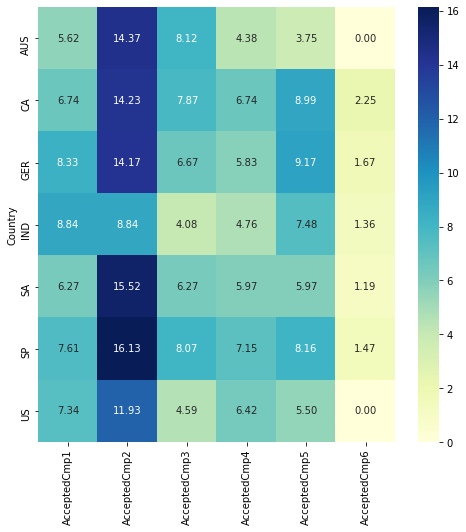

In [47]:
#Let's filter the observations for 'ME' country as they are only 3 such observations
df_not_mexico=df[df.Country!='ME']

#Plot
plt.figure(figsize=(8,8))
sns.heatmap((df_not_mexico.groupby('Country').sum()[Camp_cols]/df_not_mexico.groupby('Country').count()[Camp_cols])*100, annot=True, fmt='0.2f', cmap="YlGnBu")

----
**Observations: (Answer for Q6)** _-ShwetaC._

Part 1: 'NumberofChildren':

- Customers with no children have overall higher acceptance rate for all campaigns compared to other values
- More than 25% of customers with no children accepted campaign 2
- The acceptance rate for all campaigns trends similary on a lower percentage for customers with 1, 2 or 3 children with only slight variations
- Campaigns 2 and 5 have slightly more acceptance rate for customers with children.

Part 2: 'MaritalStatus':

- Widowed customers have highest percentage acceptance for campaigns overall in this category, with 25% Widowed customers accepting campaign 2, and ~12.5% accepting campaign 5.
- Single customers also show high acceptance for campaign 2 at 22%. Their response to other campaigns is lukewarm ~6-7% for campaigns 1, 3, 4 and 5 and near 0 for campaign 6.
- Divorced customers show the third highest peak for campaign 2 at ~20%, but for rest of the campaigns only 5-10% customers show acceptance.
- Custmers with status Married and Together show lower acceptance rates ranging around 5-11% for all campaigns.
- Response to campaign 6 is very low for customers of all types of marital status.

Part 3: 'Country':

- Campaign 1 has high acceptance in countries IND, GER, SP and US in the range 7.3-8.8%
- Campaign 2 has highest overall acceptance from all countries in the range of 12-16%, except for IND. 
- Campaign 3 has more acceptance in countries AUS, SP, and CA
- Campaign 4 has most acceptance in SP, CA and US
- Campaign 5 is the second most accepted campaign by customers from all countries, with high acceptance rates of 7.5-9.2% in countries GER, CA, SP and IND.
- Campaign 6 is the least accepted campaign across all countries, with highest acceptance of 2.5% from CA

----

### Check the product preferences by customers

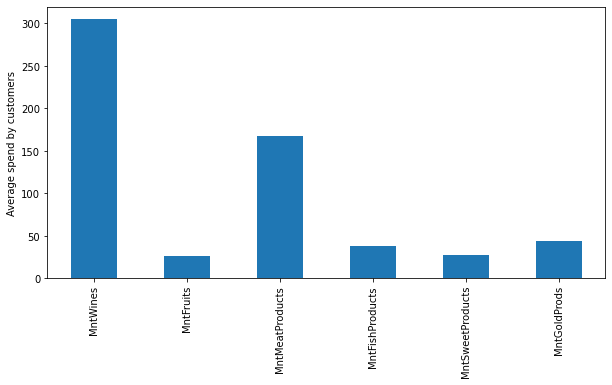

In [48]:
#creating a list which contains name of all products

mnt_cols = [col for col in df.columns if 'Mnt' in col]

spending=df[mnt_cols].mean(axis=0)
spending.plot(kind='bar', figsize=(10,5))
plt.ylabel("Average spend by customers")
plt.show()

**Observations**:

- The mean amount spent by customers in the last 2 years is highest for wines followed by meat products.

Let's check if the product preferences are similar for different types of customers. We will calculate the percentage amount spent by customers on a product for each category with respect to the total spending by customers belonging to that category.

In [49]:
def amount_per_category(df, column_name):
    df_new1=((df.groupby([column_name]).sum()[mnt_cols].T)/df.groupby([column_name]).sum()['Total_Spending'])*100
    plt.figure(figsize=(10,8))
    sns.heatmap(df_new1.T, annot=True, cmap="YlGnBu")
    plt.show()

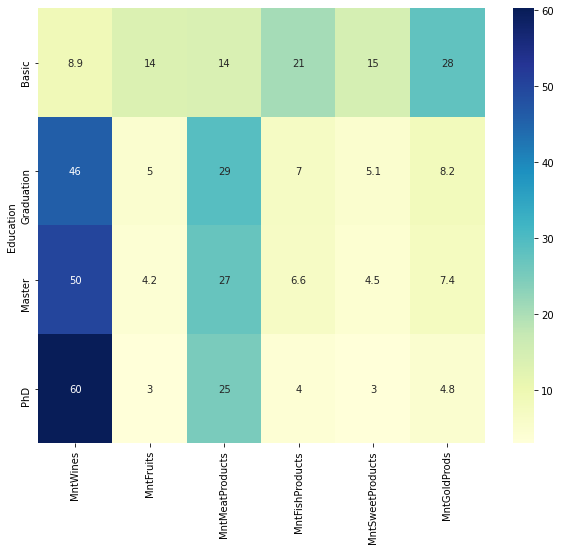

In [50]:
# plot showing the percentage of total spending of different products by a group of customers having the same education level

amount_per_category(df, 'Education')

**Observations:**
- Customers with PhD spend ~60% of their total spending on wines.
- Customers with Graduation and Master's spend ~45-50% of their total spending on wines.
- Customers with Graduation and Master's spend ~27-29% of their total spending on meat.
- Customers with PhD spend ~25% of their total spending on meat.
- Customers having education level Master or PhD spend ~80% on meat and wines.
- Customers with basic education spend more on Fruits, Fish, Sweet, and Gold products.

### **Question 7: Write the code and your observations on percentage amount spent on different products for each category of the mentioned categorical variables.** - 7 Marks

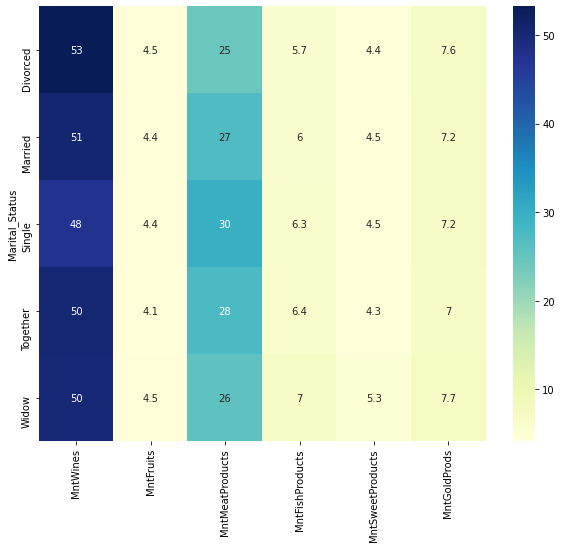

In [51]:
#call the function amount_per_category for Marital_Status with dataframe df_rest

amount_per_category(df_rest, 'Marital_Status')  #Q7 part1 answer -ShwetaC

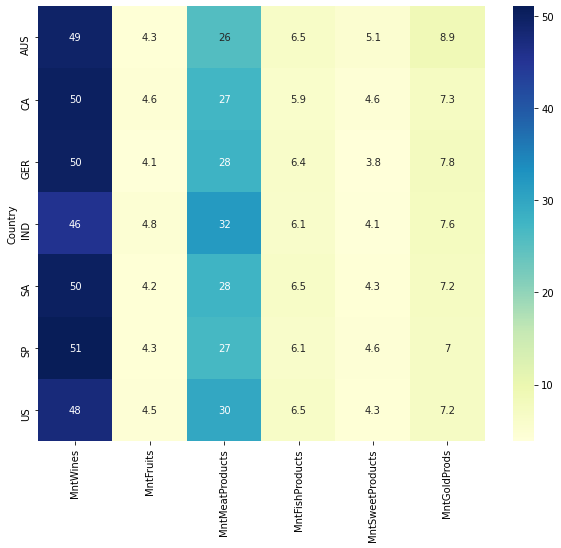

In [52]:
#call the function amount_per_category for Country with dataframe df_not_mexico

amount_per_category(df_not_mexico, 'Country')  #Q7 part2 answer -ShwetaC

----
**Observations: (Answer to Q7)** _-ShwetaC._

Part 1: Marital Status
- Divorced customers spent 53% of their total spending on wines and 25% on meats.
- All categories of Marital_Status variable spent around 50% of thier total spendings on Wines
- Single customers spent 30% of their total spending on Meat products.
- All categories of Marital_Status variable spent around 25-30% of their total spendings on Meat products.
- On an average, all customers with any marital status spent around 78% of their total expenditure on meat and wines combined
- All customers spend very less around 4-5% on Fruits and Sweets, and around 6.5% on Fish.
- It can be observed that all types of customers have high expenditure on wine and meats, and low expenditure on other products when customers are grouped by marital status.

Part 2: Country
- Customers spend highly (46-51%) of their total expenditure on wines across all countries, customers in Spain being the highest at 51%
- Customers spend 26-32% of their total spendings on meat products in all countries, customers in India being the highest at 32%
- Percentage spending on other products are significantly lower compared to Wines and Meats
- Around 78% of total spending is on the top two products types (wines and meat products), whereas only ~22% of total spendings are on the products Fruits, Fish, Sweets and Gold products.

----

### Check different channel performances 

Let's calculate the percentage of purchases for all the channels.

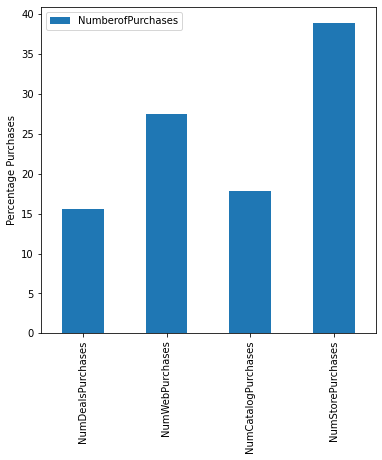

In [53]:
# list of cols for channels

channel_cols = [col for col in df.columns if 'Purchases' in col] 

#making dataframe of columns having purchase and taking sum of them.
channels = pd.DataFrame((df[channel_cols].sum()/df.Total_Purchase.sum())*100, columns=['NumberofPurchases'])

# plot
channels.plot(kind='bar', figsize=(6,6))
plt.ylabel("Percentage Purchases")
plt.show()

**Observations**:

- We can see that the most purchases are from the stores followed by web purchases.
- Number of deal purchases and catalog purchases are low.

### **Question 8: Write your observations on percentage purchases from different channels for different categories of the income_cat column.** - 4 Marks

Let's check how number of purchases via different channels varies for different income bins.


In [54]:
#Binning the income column
df['income_cat']=pd.qcut(df.Income, q=[0, 0.25, 0.50, 0.75, 1], labels=['low', 'medium', 'high', 'very_high'])

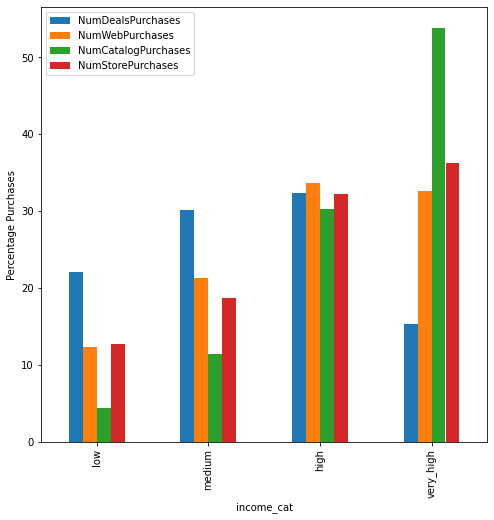

In [55]:
group=df.groupby('income_cat').sum()[channel_cols]
((group/group.sum())*100).plot(kind='bar', figsize=(8,8))
plt.ylabel("Percentage Purchases")
plt.show()

----
**Observations: (Answer for Q8)**  _-ShwetaC._

In the above plot diagram, Total number of purchases for each Purchase channel have been divided into the different Income bins by percentage purchases. For e.g. Percentage purchases for Deals Channel by each income group is 
Low:22% + Medium:30% + High:32% + VeryHigh:16% = Total:100% 

- Purchase channels percentage purchases have similar pattern for low and medium income bins.
- High income group shows a balance in percentage purchases by different types of purchase channels.
- Percentage purchases are higher in the two higher income groups and lower in the two lower income groups.
- Most purchases via Deals channel are bought by customers in High and Medium income levels, at ~32% and 30% respectively. 
- Third highest users of Deals channel were Low income level customers who used nearly 22% of purchases in Deals channel.
- Purchases by Deals are not very popular in very_high income bin.
- Most Web purchases are done by customers in High income level at ~35%, followed by ~33% web purchases done by customers in Very_high income level. Web purchases are less popular in Medium and Low income groups at around 20% and 12% respectively.
- Most catalogue purchases are done by customers in Very_high income level, at ~55%, followed by High income level customers using 30% of Catalogue channel purchases.
- Store purchases are also most popular in High and Very_high income level customers at 32% and 35% respectively.

----

### We can also visualize the correlation by purchases from different channels and income of the customer.

### **Question 9: Find the correlation matrix for the columns mentioned below and visualize the same using heatmap.** - 3 Marks

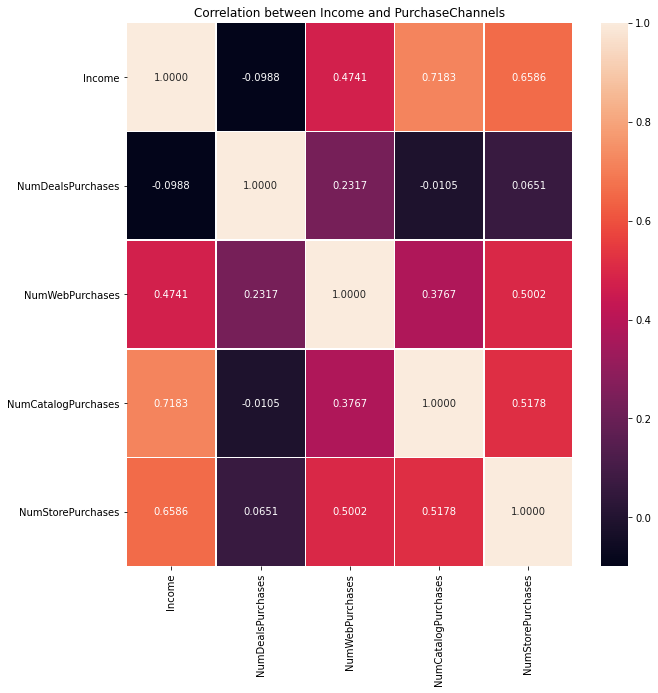

In [56]:
#Write your code here
# ---
# Q9 answer -ShwetaC.
#correlation matrix is created below using the income and purchases columns
corrmatrix=df[['Income', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases' ]].corr()

# Ploting correlation plot
f,ax = plt.subplots(figsize=(10, 10))

# plotting the heat map
sns.heatmap(corrmatrix, annot=True, linewidths=.5, fmt= '.4f',ax=ax)

# specify name of the plot
plt.title('Correlation between Income and PurchaseChannels')
plt.show()


----
**Observations: (Answer for Q9)** _-ShwetaC._

- As we can see in this correlation heatmap, the Income of Customer is most highlypositively correlated with the Catalogue purchases at 0.72.
- Customer Income is also positively correlated to Store purchases at 0.66, showing more store purchases in the mid to high range of income levels, as also has been observed earlier.
- Customer Income to Web purchases correlation is moderate at 0.47 indicating that there is a slow change in web purchases across the income levels of customers.
- Purchases by Deals channel show a negative correlation to Income of customers at -0.09 correlation value, which actually shows that as customer income levels rise, Deals purchases go down in percentage.
- Based on above heatmap correlation analysis plus observations from Q8, it can be confirmed that the high income level customers are more interested in Catalogue and Store purchases than other channels as web and deals. Whereas Deals and Web purchases are more popular in low and medium income customers.

----

#### As we know from our analysis we have done so far that customers with income, number of children, and amount spending on wines are the important factors.  Let's try to come up with new customer profile on the basis of these 3 attributes and check what would be the acceptance rate for that customer profile.

In [57]:
df3=df[df.Income>52000]
df4=df3[df3.MntWines>df3.MntWines.mean()]
new_profile=df4[df4.NumberofChildren==0]

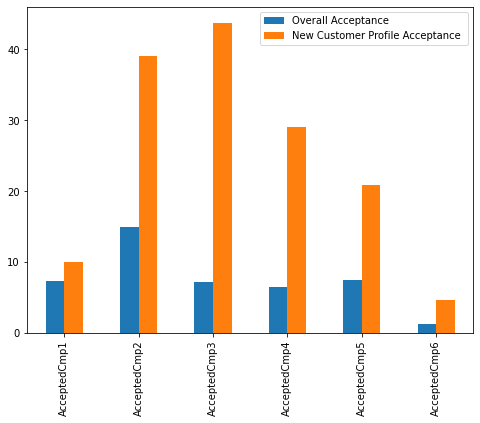

In [58]:
#Calculating success rate of each campaign for both segments 
success_campaign3=pd.DataFrame(success_campaign, columns=['Overall Acceptance'])

success_campaign4=pd.DataFrame((new_profile[Camp_cols].sum()/new_profile.shape[0])*100, columns=['New Customer Profile Acceptance '])

# plot
pd.concat([success_campaign3, success_campaign4], axis=1).plot(kind='bar', figsize=(8,6))
plt.title("")
plt.ylabel("")
plt.show()

**Observations:**
- Orange bars in the plot indicates that acceptance rate would have been high for new customer profile i.e. income greater than the mean income, no kid at home, amount spent of wines is greater than the mean amount spent on wines.

### **Question 10: Based on your analysis, write the conclusions and recommendations for the CMO to help make the next marketing campaign strategy.** - 10 Marks

# Conclusion and Recommendations

----
**(Answer to Q10)** _-ShwetaC._

## Conclusions

In this project, we analyzed a dataset of nearly 2200 records of customer purchases
for over 2 years from various countries for the store 'All You Need'. The main feature of interest here is the turnaround of marketing campaigns with offers. How Campaigns offers are accepted determines the further purchases via different channels for the 'All You Need' Store. Thus we determined the factors that affect campaign acceptance and product purchases related to it. 

**Key insights into the observation of various data elements is as follows:**

#### Campaigns Acceptance Rates
- Campaign 2 was the most successful at ~15%
- Campaigns 1, 3, 5 and 4 had similar response ranging in 6.5 to 7.5%
- Campaign 6 got the least response at ~1%
- Campaign 2 was accepted by customers who made most recent purchases.
- Campaign 2 and 5 have high correlation to Deals, Store and Web purchases
- Campaign 3 and 4 have high correlation to Wines and Meat products
- Most acceptance rate density is towards the center, where income levels are well above 60k.

#### Customer Profiles
- Customers age ranges from 27 to 75 years for 95% of data
- Customers with no children or 1 child show more campaign acceptance
- Customers with higher education responded more to campaigns
- Customers with income ranging in 70K to 90K were most consistent in responding to all campaigns
- Almost 49% customers are from Spain and ~26% customers are from SA and CA combined. 
- Customers with most recent purchases showed highest response to campaign 2 followed by campaigns 1 and 5
- Customers who were married / together showed lesser acceptace rate for campaign offers as compared to Single/divorced/widowed customers
- Customers with higher incomes have higher average expenditure on preferred products (wines and meat products).
- Customers with high education levels like PhD spent more on Wines and Meat products.
- Customers with higher than average incomes also spent more in Stores and Catalogue purchases compared to deals and web purchases
- Customers with lower than average incomes have lower average expenses, but may spend more on Deals and Store purchases
- Customers with higher than average web visits also showed higher than average web purchases
- Customers who preferred web purchases also showed high acceptanse rate to all marketing campaigns

#### Purchase Channels
- Given that the average web purchases are around 4.1, and average monthly Web Visits are 5.3, online Customers have more than 77% rate of purchases via Web channel when making a Web visit
- Deals are highly popular amongst the low, medium and high income groups, but sparingly used in the Very_high income level.
- Web purchases are more popular across medium and high income, and have a very high correlation with number of web visits.
- Catalog and Store purchases are more popular with higher income customers
- Purchase channel preference trends are similar for the two income groups - below median and above median. 
- More average spending is observed across all channels in higher income groups

#### Product Preferences
- Across different categorical variables like Country, Marital Status and Education, and also for Income levels higher than median, it is observed that the top two preferred products are Wines and Meat products. 
- Customers who spent more towards the top 2 preferred products also had a high acceptance rates for campaigns 2, 3 and 4.
- Customers with lower incomes and basic education spent more on other products like Fish, Fruits, Gold and Sweet products.

 
## Recommendations

**Based on the key insights in each of the above areas like customer profiles, product preferences and campaign acceptance analyses, following would be my recommendations to the business:**

- Around 64% of customers are married/together. They show a steady trend of campaigns acceptance rates, however it is slightly lower than the customers in other marital_status. Such customers can be attracted by making marketing strategies towards family-oriented products or campaigns. This can help in increasing their response to future campaigns.

- Customers with 2+ children show lower acceptance to campaign offers. Strategizing towards making more inclusive marketing campaigns or offers for families with kids can help get engagement from this customer segment.

- Customers with no children or 1 child had more average spending and more acceptance to campaigns. Also, customers who were Single/Widowed/Divorced showed a very high acceptance to campaigns and higher average spendings across preferred products like Wines and Meat products. Customers from these group can be targted for loyalty rewards and continued engagement in marketing campaigns related to preferred products.

- Customers with higher education levels showed high acceptance to campaigns as well as spent higher than average on Wines and Meat products. Targeted offers, loyalty rewards can be introduced to keep them engaged in these campaigns and sales.

- Customers with lower education showed positive correlation to average spending on products like Fruits, Fish, Sweets and Gold products. More researched campaigns, offers or deals around their preferred products can be designed to attract these customers.

- Campaign 2 was the most widely accepted campaign across all customer bases and was most well received by recently visiting customers. So, it can be focused upon to for further analysis to see what makes it successful across all types of customers. It can receive more operating and research budget to help future analysis.

- Campaign 6 saw least response at around 1.3% across all customer bases. It was responded to by only 30 out of 2200+ customers, with most response from the high income group. This campaign can be explored further to see what makjes it work for that group, which products and purchase channels does it relate to; and how it can improved further to get wider reach and acceptance across other customer groups.

- Campaign acceptance rates are high and consistent for Customers using Web Purchases. Also turnaround rate from web visits to web purchases is high at above 77%. So, campaigns targetting online customers can be designed to get higher acceptance rates for campaign offers.

- Customers with most recent purchases showed high acceptance for campaign 2 and few more campaigns; so above the line marketing strategies like incentives to frequently returning customers to increase the recency rate can help in getting more acceptance to campaigns in future.

----
 
_-ShwetaC. 08-Nov-2021_

----